In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df = pd.read_excel("data/Datathon_stock_prices.xlsx")

In [98]:
#  percentage change
# df["Stock_Price_Change_%"] = df["Stock Price"].pct_change()
# df["Stock_Price_Change_%"]
# df["Stock_Price_Change"] = df.groupby("EMPLOYER_NAME")["Stock Price"].pct_change() * 100

df["Stock_Price_Change"] = df.groupby("EMPLOYER_NAME")["Stock Price"].pct_change()*100
df["Shannon_Change"] = df.groupby("EMPLOYER_NAME")["Shannon"].pct_change()*100
df["Percent_Immigrant_Change"] = df.groupby("EMPLOYER_NAME")["Percent Immigrant"].pct_change()*100


/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_83645/1621321232.py:6: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Stock_Price_Change"] = df.groupby("EMPLOYER_NAME")["Stock Price"].pct_change()*100
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_83645/1621321232.py:7: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df["Shannon_Change"] = df.groupby("EMPLOYER_NAME")["Shannon"].pct_change()*100
/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_83645/1621321232.py:8: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is de

In [99]:
# df["Stock_Price_Change"].idxmax()
# df.loc[19]["EMPLOYER_NAME"]

mask = (df["Stock_Price_Change"] < 500) & (df["Shannon_Change"] < 500)
filtered_df = df[mask]

In [100]:
shannon_mean_over_year = df.groupby("YEAR")["Shannon"].mean()
shannon_mean_over_year

YEAR
2020    0.071846
2021    0.067866
2022    0.095336
2023    0.081436
2024    0.099609
Name: Shannon, dtype: float64

Text(0, 0.5, 'Shannon Index Value')

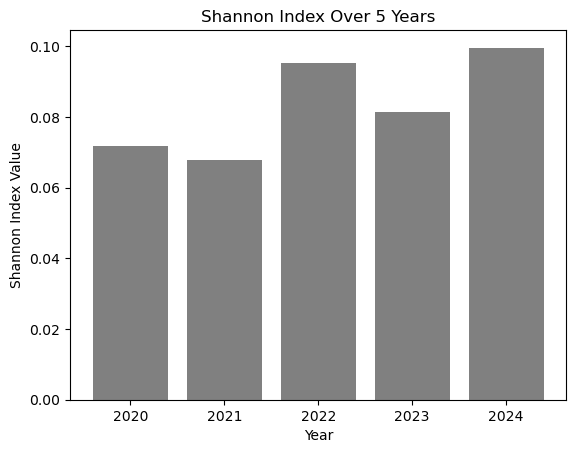

In [101]:
plt.bar(shannon_mean_over_year.index, shannon_mean_over_year.values, color='gray')
plt.title("Shannon Index Over 5 Years")
plt.xlabel('Year')
plt.ylabel("Shannon Index Value")

In [102]:
# df['shannon_mean_by_sector'] = df.groupby(["YEAR", 'NAICS_CODE'])['Shannon'].mean()
df['shannon_mean_by_sector'] = df.groupby(["YEAR", "NAICS_CODE"])['Shannon'].transform('mean')
df['stock_mean_by_sector'] = df.groupby(["YEAR", "NAICS_CODE"])['Stock Price'].transform('mean')

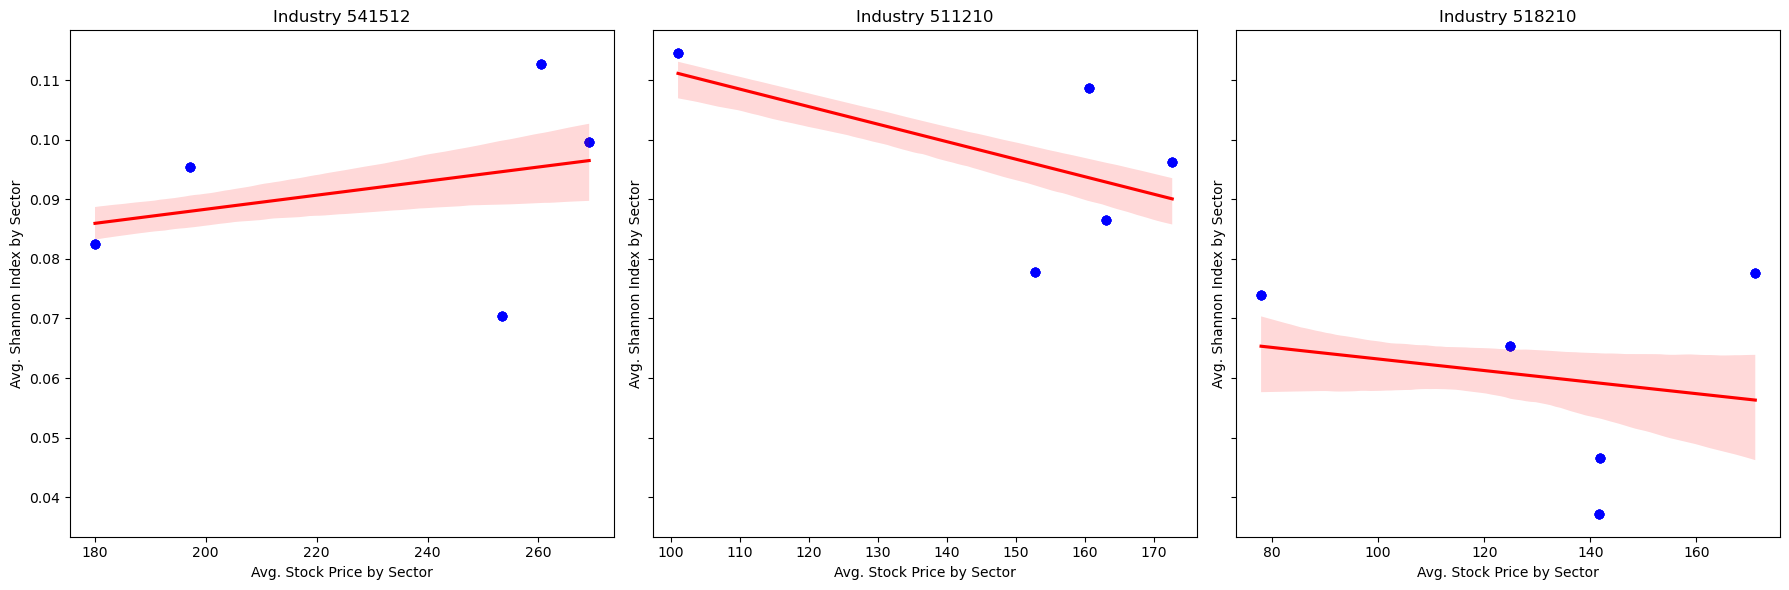

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define NAICS codes for the three industries
naics_codes = [541512, 511210, 518210]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Loop through each industry and plot
for i, code in enumerate(naics_codes):
    industry_df = df[df["NAICS_CODE"] == code]  
    
    # Scatterplot with a regression line
    sns.regplot(
        data=industry_df, 
        x="stock_mean_by_sector", 
        y="shannon_mean_by_sector", 
        ax=axes[i],  
        scatter_kws={"color": "blue", "alpha": 0.5},  # Make dots semi-transparent
        line_kws={"color": "red"}  # Best-fit line in red
    )
    
    axes[i].set_title(f"Industry {code}")
    axes[i].set_xlabel("Avg. Stock Price by Sector")
    axes[i].set_ylabel("Avg. Shannon Index by Sector")

plt.tight_layout()
plt.show()


In [104]:
df.head(5)

,EMPLOYER_NAME,NAICS_CODE,Industry,YEAR,Stock Price,Shannon,Percent Immigrant,FEIN,% Stock Change,% Shannon Change,% Immigrant Change,Stock_Price_Change,Shannon_Change,Percent_Immigrant_Change,shannon_mean_by_sector,stock_mean_by_sector
0,GOOGLE LLC,541512,Computer Systems Design Services,2020,87.59,0.202975,0.021249,770493581,1.215321,-0.167051,-0.213879,NaN,NaN,NaN,0.082505,180.028
1,COGNIZANT TECHNOLOGY SOLUTIONS US CORPORATION,541512,Computer Systems Design Services,2020,81.95,0.144565,0.017933,133924155,-0.033557,0.646441,0.967605,NaN,NaN,NaN,0.082505,180.028
2,"CAPGEMINI AMERICA, INC.",541512,Computer Systems Design Services,2020,30.83,0.125257,0.014536,222575929,0.062926,0.060004,0.061621,NaN,NaN,NaN,0.082505,180.028
3,Adobe Inc.,541512,Computer Systems Design Services,2020,500.12,0.099379,0.009027,770019522,-0.107254,-0.175965,-0.162881,NaN,NaN,NaN,0.082505,180.028
4,INTUIT,541512,Computer Systems Design Services,2020,379.85,0.103336,0.010366,770034661,0.681111,1.357216,1.993998,NaN,NaN,NaN,0.082505,180.028


In [116]:
mask = (df["Stock_Price_Change"] < 300) & (df["Shannon_Change"] < 300) & (df["Stock_Price_Change"] > -25) & (df["Shannon_Change"] > -25)
filtered_df = df[mask]

/var/folders/17/7cjczr495wgc7kvz5wdr78vc0000gn/T/ipykernel_83645/1145297577.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(filtered_df['Shannon_Change'], filtered_df["Stock_Price_Change"], cmap='viridis', edgecolors='k', color='gray')


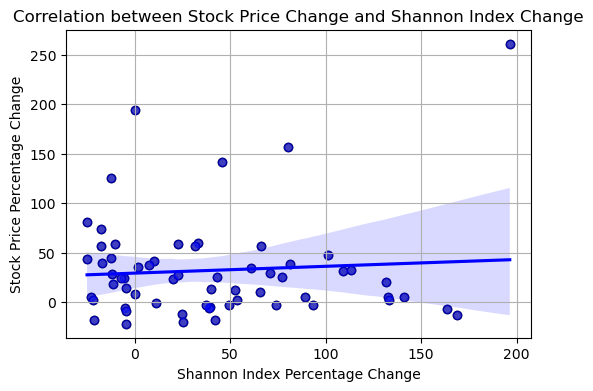

In [131]:
plt.figure(figsize=(6, 4))
scatter = plt.scatter(filtered_df['Shannon_Change'], filtered_df["Stock_Price_Change"], cmap='viridis', edgecolors='k', color='gray')
sns.regplot(data=filtered_df, x="Shannon_Change", y="Stock_Price_Change", scatter_kws={"alpha": 0.5}, color='blue')
plt.grid(True)
plt.xlabel('Shannon Index Percentage Change')
plt.ylabel('Stock Price Percentage Change')
plt.title('Correlation between Stock Price Change and Shannon Index Change')
plt.show()

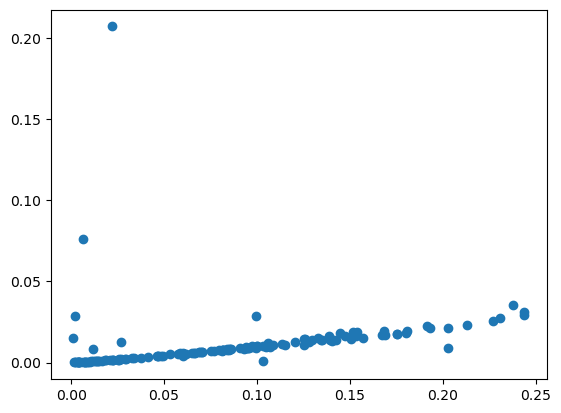

In [106]:
plt.scatter(df['Shannon'], df['Percent Immigrant'])

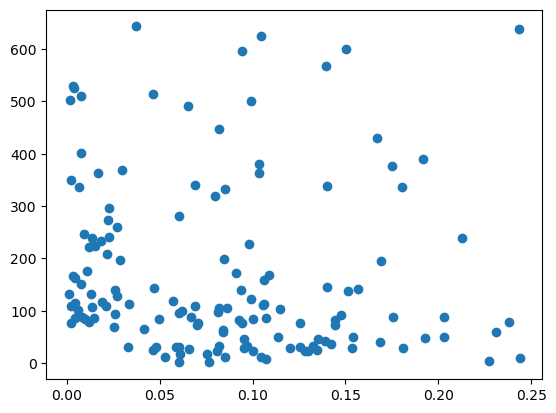

In [107]:
plt.scatter(df['Shannon'], df['Stock Price'])

In [108]:
group_industry_year = df.groupby(['YEAR', 'NAICS_CODE'])
group_industry_year['Shannon'].mean()

YEAR  NAICS_CODE
2020  511210        0.086460
      518210        0.046572
      541512        0.082505
2021  511210        0.096215
      518210        0.037245
      541512        0.070392
2022  511210        0.114473
      518210        0.073931
      541512        0.095479
2023  511210        0.077806
      518210        0.065362
      541512        0.099533
2024  511210        0.108578
      518210        0.077625
      541512        0.112624
Name: Shannon, dtype: float64

In [109]:
group_industry_year = df.groupby(['YEAR', 'NAICS_CODE'])
group_industry_year['Stock Price'].mean()

YEAR  NAICS_CODE
2020  511210        163.09625
      518210        141.80600
      541512        180.02800
2021  511210        172.71800
      518210        141.72000
      541512        253.49000
2022  511210        100.99200
      518210         77.91800
      541512        197.23400
2023  511210        152.82600
      518210        124.87800
      541512        269.14300
2024  511210        160.69700
      518210        171.09200
      541512        260.48500
Name: Stock Price, dtype: float64